In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [22]:
NON_HR = 'CNN_results/'
HR = 'HR_results_2/'

In [23]:
CNN_nll_train = np.load(NON_HR + 'nll_result_train.npy')
CNN_nll_val = np.load(NON_HR + 'nll_result_val.npy')
CNN_nll_test = np.load(NON_HR + 'nll_result_test.npy')
HR_nll_train = np.load(HR + 'nll_result_train.npy')
HR_nll_val = np.load(HR + 'nll_result_val.npy')
HR_nll_test = np.load(HR + 'nll_result_test.npy')

CNN_kld_train = np.load(NON_HR + 'kld_result_train.npy')
CNN_kld_val = np.load(NON_HR + 'kld_result_val.npy')
CNN_kld_test = np.load(NON_HR + 'kld_result_test.npy')
HR_kld_train = np.load(HR + 'kld_result_train.npy')
HR_kld_val = np.load(HR + 'kld_result_val.npy')
HR_kld_test = np.load(HR + 'kld_result_test.npy')
x_range = np.arange(len(CNN_nll_val))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


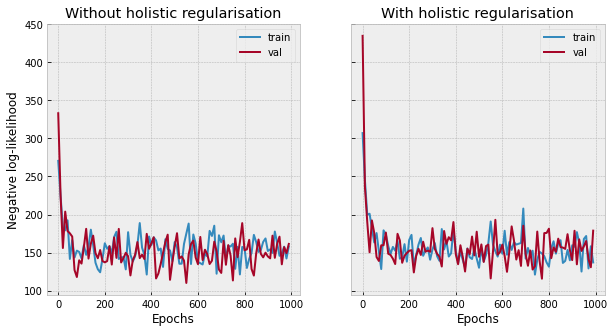

In [24]:
with plt.style.context('bmh'):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharey=True, sharex=True)

    ax1.plot(x_range, CNN_nll_train, label='train')
    ax1.plot(x_range, CNN_nll_val, label='val')
    ax1.legend()
    plt.xticks(np.arange(0,101,step=20),np.arange(0,101,step=20)*10)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Negative log-likelihood')
    ax1.set_title('Without holistic regularisation')
    ax2.plot(x_range, HR_nll_train, label='train')
    ax2.plot(x_range, HR_nll_val, label='val')
    ax2.set_xlabel('Epochs')
    ax2.legend()
    ax2.set_title('With holistic regularisation')
    plt.savefig('training_curves.eps')

Reconstruction error

In [25]:
HR_recon_test = np.subtract(HR_nll_test, HR_kld_test)
CNN_recon_test = np.subtract(CNN_nll_test, CNN_kld_test)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


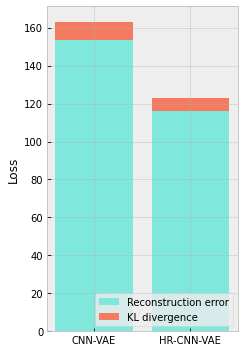

In [26]:
with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(3.5,5))
    x_labels = ['CNN-VAE', 'HR-CNN-VAE']
    ax.set_ylabel('Loss')
    ax.bar(x_labels, [CNN_recon_test[-1], HR_recon_test[-1]], label='Reconstruction error', color='#7fe7dc')
    ax.bar(x_labels, [CNN_kld_test[-1], HR_kld_test[-1]], label='KL divergence', bottom=[CNN_recon_test[-1], HR_recon_test[-1]], color='#f47a60')
    ax.legend(loc='lower right')
    fig.tight_layout()
    fig.savefig('losses.eps')


In [27]:
CNN_ppl = np.load(NON_HR+'ppl_result_test.npy')
HR_ppl = np.load(HR+'ppl_result_test.npy')

In [28]:
print(f"For CNN-VAE, NLL loss is {CNN_nll_test[-1]} and PPL {CNN_ppl[-1]}.")
print(f"For HR-CNN-VAE, NLL loss is {HR_nll_test[-1]} and PPL {HR_ppl[-1]}.")


For CNN-VAE, NLL loss is 163.0712661743164 and PPL 114.6308822631836
For HR-CNN-VAE, NLL loss is 122.8119125366211 and PPL 82.470703125
